# measure disparities
- make a dataframe of model predictions and demographics
- run `measure_disparity.py` on the dataframe

# run measure_disparity.py on model output

In [1]:
%run measure_disparity.py --dataset base_model_mimic4_admission.csv 

reading in base_model_mimic4_admission.csv
demographic columns: ['insurance', 'ethnicity', 'gender']
Overall Performance
	Measures of predictive bias on the whole population.
╭─────────┬─────────┬───────────────────┬───────┬───────┬────────────╮
│   AUROC │   AUPRC │   Positivity Rate │   FPR │   FNR │   Accuracy │
├─────────┼─────────┼───────────────────┼───────┼───────┼────────────┤
│   0.881 │    0.77 │             0.299 │  0.08 │ 0.409 │      0.823 │
╰─────────┴─────────┴───────────────────┴───────┴───────┴────────────╯
Subgroup Fairness Violations
	Measures the deviation in performance for marginal and intersectional groups.
	Note that these deviation are weighted by group prevalence to produce stable estimates when sample sizes are small.
╭─────────────┬───────────────────────────────┬──────────┬─────────────────────┬─────────┬─────────┬───────────────────╮
│   insurance │                     ethnicity │   gender │   Brier Score (MSE) │     FNR │     FPR │   Positivity Rate │
├──

# Visualizing results

Running `measure_disparity.py` produces a `df_fairness.csv` file containing the resultant fairness metrics. Below, we show how to use this to generate additional figures for assessing model performance and bias. 

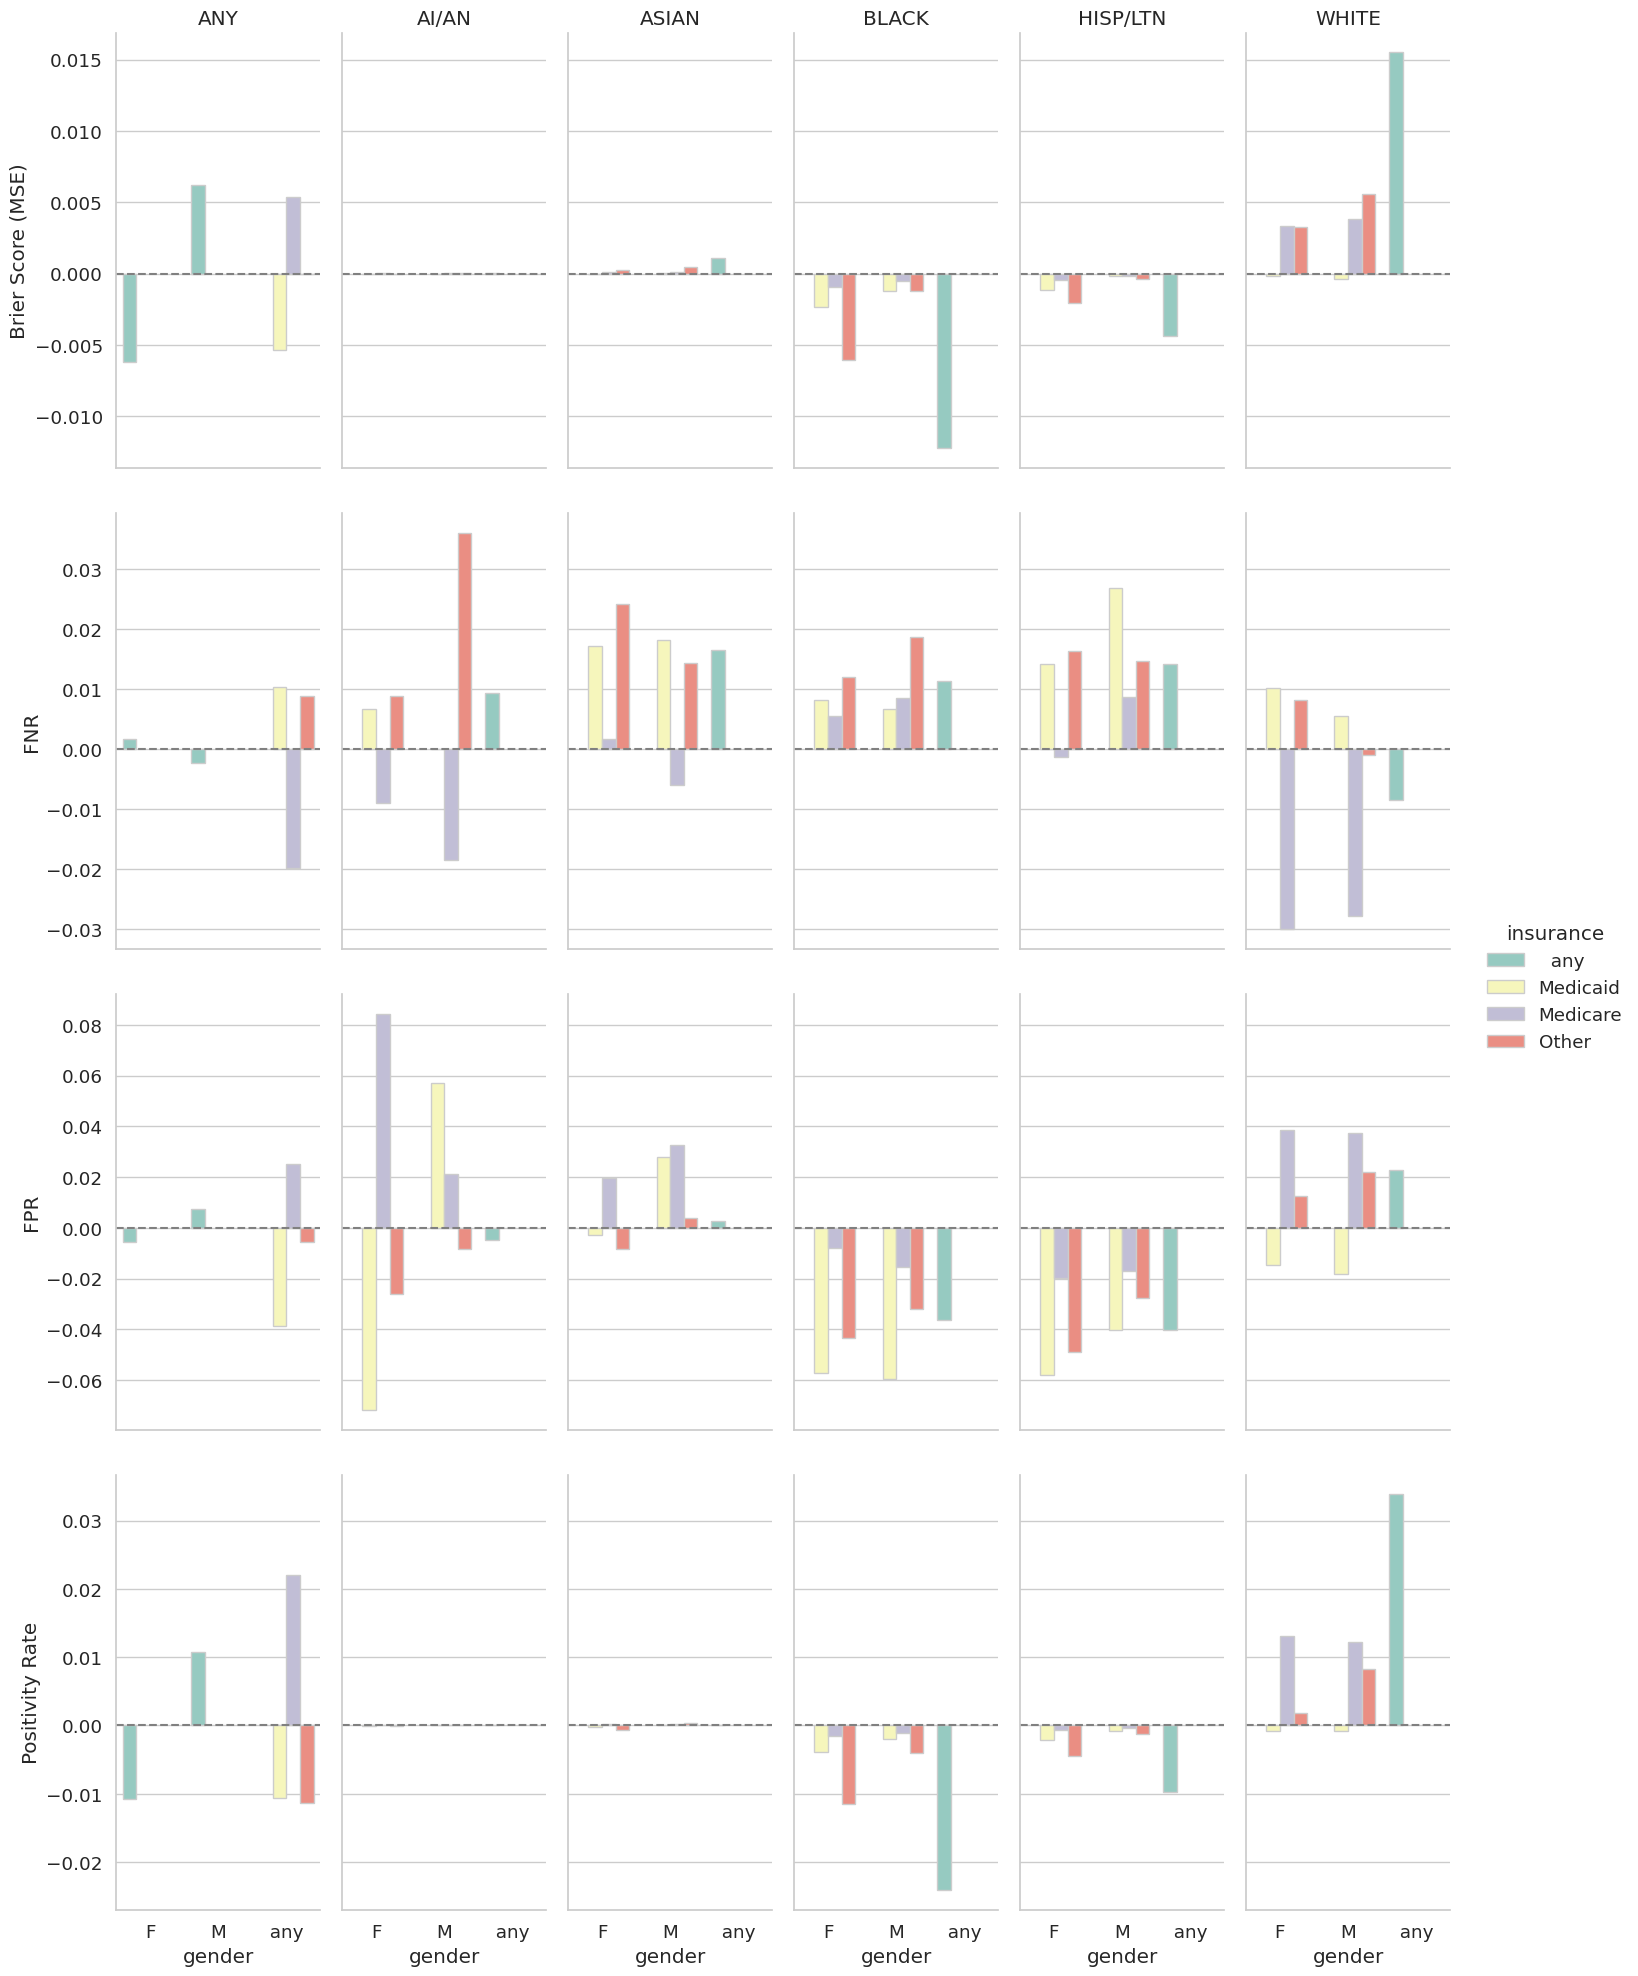

In [44]:
df_fairness = pd.read_csv('df_fairness.csv') 
df_plt = df_fairness.melt(
    id_vars = ['insurance','ethnicity','gender']
)
df_fairness
import seaborn as sns
sns.set_theme(style='whitegrid',font_scale=1.2)

g = sns.catplot(
    kind='bar',
    edgecolor="0.8",
    data=df_plt,
    row='variable',
    col='ethnicity',
    x='gender',
    hue='insurance',
    y='value',
    sharey='row',
    aspect=0.5,
    palette='Set3'
)

g.refline(y=0)
# g.set_titles(template='{col_name}')
nice_cols = {
'AMERICAN INDIAN/ALASKA NATIVE':'AI/AN',
    'BLACK/AFRICAN AMERICAN':'BLACK',
    'HISPANIC/LATINO':'HISP/LTN',
    'WHITE':'WHITE',
    '  any  ':'ANY',
    'ASIAN':'ASIAN'
}
for (row,col),ax in g.axes_dict.items():
    if 'any' in col: 
        ax.set_ylabel(row)
    if 'Brier' in row:
        ax.set_title(nice_cols[col])
    else:
        ax.set_title('')
        
# g.figure.subplots_adjust(wspace=0, hspace=0)